****MLSC ARTIFICIAL INTELLIGENCE & DATA SCIENCE-TECHROOM 1****

*TOPIC-Advanced EDA & Feature Engineering*

Obesity is a great challenge for health worldwide, which cause various health disease and reduce life quality. With the help of this data set we aims to estimate the obesity level in individuals based on their physical activities, eating habits, family history on overweight, etc. We will use various methods on the dataset gathered from public online survey to prevent and reduce the obesity level.
the target of this dataset is 'NObeyesdad'.
Here's a description of each column in the dataset:

1. **Age**: The age of the individual.
2. **Gender**: The gender of the individual (e.g., Male, Female).
3. **Height**: The height of the individual in meters.
4. **Weight**: The weight of the individual in kilograms.
5. **CALC**: Unknown column. You might need to check the data source or documentation to understand what this column represents.
6. **FAVC**: Whether the individual frequently consumes high caloric food (e.g., yes, no).
7. **FCVC**: Frequency of consumption of vegetables (numeric scale).
8. **NCP**: Number of main meals per day (numeric scale).
9. **SCC**: Squamous cell carcinoma
10. **SMOKE**: Whether the individual smokes (e.g., yes, no).
11. **CH2O**: Consumption of water daily (numeric scale).
12. **family_history_with_overweight**: Whether the individual has a family history of overweight (e.g., yes, no).
13. **FAF**: Physical activity frequency (numeric scale).
14. **TUE**: Time using technology devices (numeric scale).
15. **CAEC**: Unknown column. You might need to check the data source or documentation to understand what this column represents.
16. **MTRANS**: Mode of transportation (e.g., Public Transportation, Walking).
17. **NObeyesdad**: Obesity level of the individual (e.g., Normal_Weight, Overweight_Level_I).

Some columns have numeric values, some are categorical, and others seem to be ordinal.


**Data Loading and Initial Inspection**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier


In [2]:
data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic - ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
data.shape
data.info()
data.describe()
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

### Missing Data:-
##### There is no missing data in the dataset provided but if there was any here is how we would treat the dataset to remove the missing values. Now the tools used Simple Imputer(A Class in Sklearn that helps while dealing with missing data) and LabelEncoder(Converts the categorical text data to numerical data so we can deal with the DataFrame easily).

First we check if any missing data is there in the dataset, then we make create an imputer to deal with the missing values and apply that imputer to the Dataframe. Then we categorise the columns so we can again create an imputer that will replace the missing values with the most frequent values when applied. Then we create a copy of the dataset so the original dataset remains unchanged and for each categorical column we apply label encoding to convert the text categories to the numeric labels. If the target column(NObeyesdad) is also categorical then we apply label encoding to that column as well. 

In [4]:
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC',  'CH2O', 'FAF', 'TUE']
# Handle missing values
print("Missing values before handling:")
print(data.isnull().sum())

# Numerical features
num_imputer = SimpleImputer(strategy='median')
data[numerical_cols] = num_imputer.fit_transform(data[numerical_cols])

# Categorical features - first identify them correctly
cat_cols = data.select_dtypes(include=['object']).columns
print("\nCategorical columns:", cat_cols.tolist())

# Only impute if there are categorical columns with missing values
if len(cat_cols) > 0:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    data[cat_cols] = cat_imputer.fit_transform(data[cat_cols])

print("\nMissing values after handling:")
print(data.isnull().sum())

# Encode categorical variables
le = LabelEncoder()
data_encoded = data.copy()

# Encode each categorical column
for col in cat_cols:
    data_encoded[col] = le.fit_transform(data[col].astype(str))

# Encode target variable if it's categorical
if 'NObeyesdad' in data.columns:
    data_encoded['NObeyesdad'] = le.fit_transform(data['NObeyesdad'])

Missing values before handling:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Categorical columns: ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad']

Missing values after handling:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0


### Correlation between the values

Correlation Matrix:
             Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
Age     1.000000 -0.025958  0.202560  0.016291 -0.043944 -0.045304 -0.144938   
Height -0.025958  1.000000  0.463136 -0.038121  0.243672  0.213376  0.294709   
Weight  0.202560  0.463136  1.000000  0.216125  0.107469  0.200575 -0.051436   
FCVC    0.016291 -0.038121  0.216125  1.000000  0.042216  0.068461  0.019939   
NCP    -0.043944  0.243672  0.107469  0.042216  1.000000  0.057088  0.129504   
CH2O   -0.045304  0.213376  0.200575  0.068461  0.057088  1.000000  0.167236   
FAF    -0.144938  0.294709 -0.051436  0.019939  0.129504  0.167236  1.000000   
TUE    -0.296931  0.051912 -0.071561 -0.101135  0.036326  0.011965  0.058562   

             TUE  
Age    -0.296931  
Height  0.051912  
Weight -0.071561  
FCVC   -0.101135  
NCP     0.036326  
CH2O    0.011965  
FAF     0.058562  
TUE     1.000000  


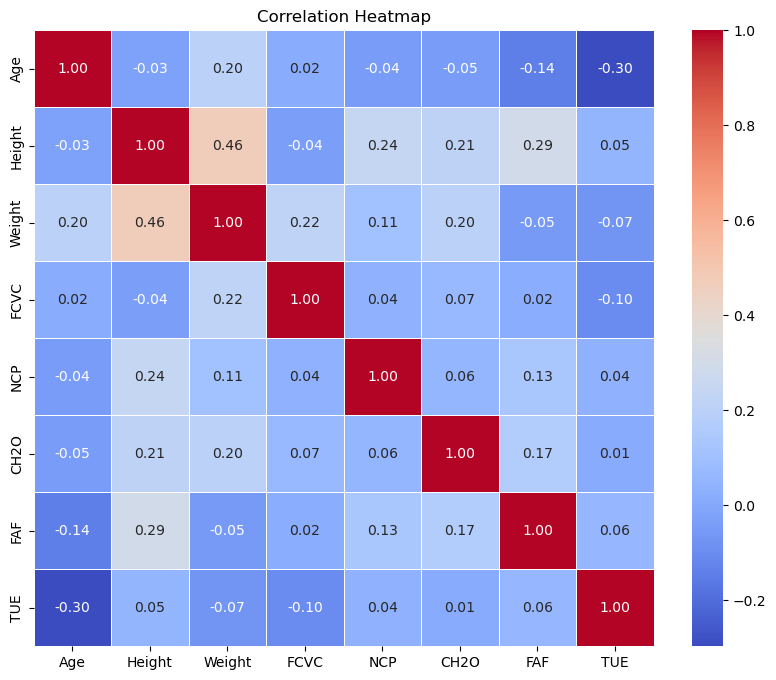

In [5]:
# Calculate the correlation matrix
# Select only numeric columns
numeric_df = data.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()


# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Outlier Detection
##### Identifies extreme values that may skew analysis(Basically identifying data points that deviate from the dataset)

##### Uses IQR method (Q1-1.5*IQR to Q3+1.5*IQR)

##### Critical for robust model training

##### Particularly important for Weight, Height, and Age features*

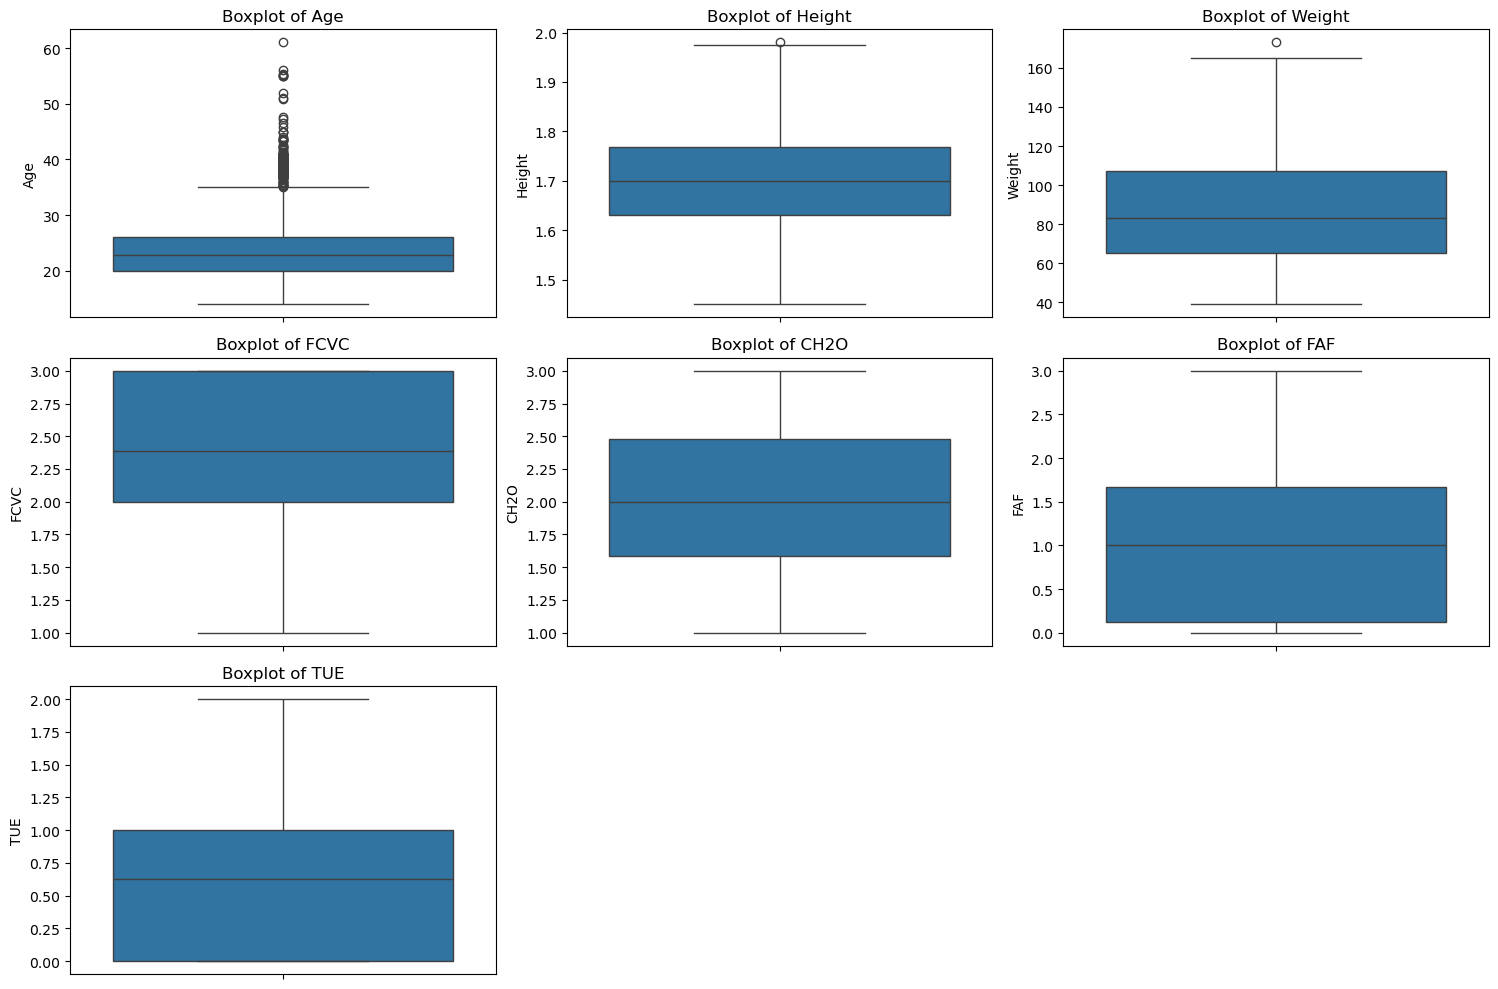

In [6]:

# 1. Outlier Detection
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC',  'CH2O', 'FAF', 'TUE']

# Visualize outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=data, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd

def remove_outliers_iqr(data, columns):
    cleaned_df = data.copy()
    for col in columns:
        Q1 = cleaned_df[col].quantile(0.25)
        Q3 = cleaned_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower) & (cleaned_df[col] <= upper)]
    return cleaned_df

# Example usage:
columns_to_clean = ['Age','Height','Weight','FCVC','CH2O','FAF','TUE']
df_clean = remove_outliers_iqr(data, columns_to_clean)

print("Original shape:", data.shape)
print("After outlier removal:", df_clean.shape)


Original shape: (2111, 17)
After outlier removal: (1942, 17)


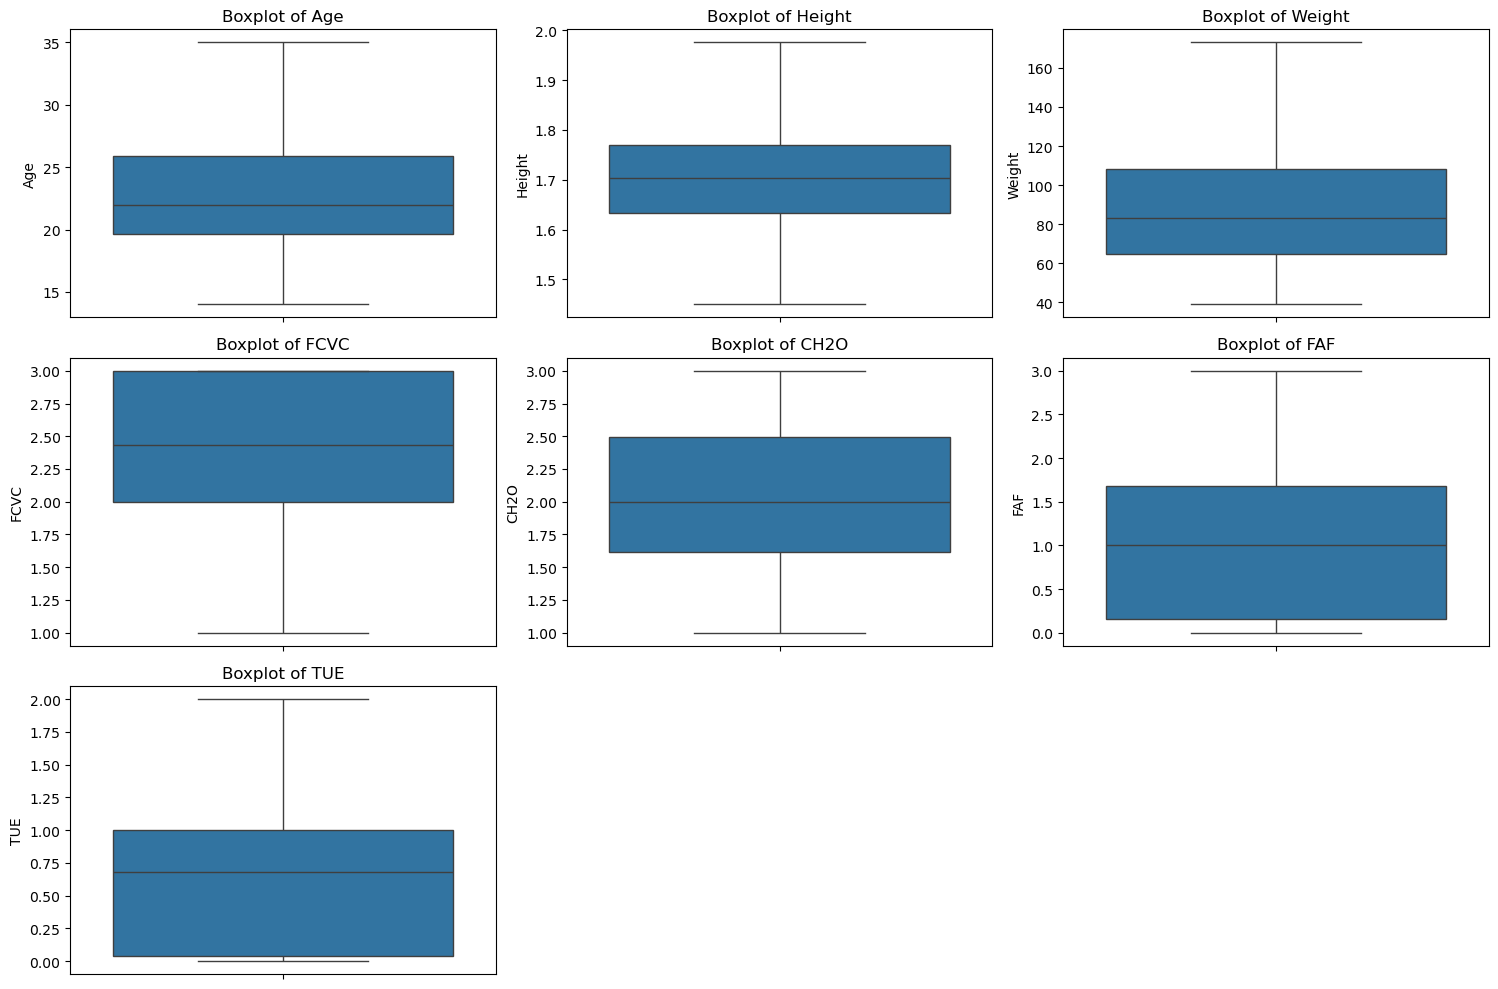

In [8]:

# Without outliers
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC',  'CH2O', 'FAF', 'TUE']

# Visualize
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df_clean, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


### 2.Skewness Analysis :- 
1) Measures asymmetry in feature distributions

2) Values >1 or <-1 indicate significant skew

3) Weight and FAF showed high positive skewness

4) Log/sqrt transforms help normalize distributions
5) Skewness:- Skewness is basically how much assymetrical the data is, tails are basically the extreme ends of a data, suppose if a data has a long right tail i.e values farther from the mean have neglible or very very less change in values than the values closer to the mean in the same value range. Through this code we reduce the skewness, for example take the values of TUE which has the highest skewness(0.62), the distribution is highly assymetrical but as you can see later on that after we apply power transformers and feature scale the data the skewness gets reduced to -0.2 which is more feasible than 0.62.
##### Textbook Definition:- Skewness is a measure of the asymmetry of a distribution. It quantifies how much a probability distribution deviates from being symmetrical around its mean. A distribution with zero skewness is perfectly symmetrical, while positive skewness indicates a distribution with a longer or fatter tail on the right side, and negative skewness indicates a longer or fatter tail on the left side.

Skewness of numerical features:
Age       1.529100
Height   -0.012855
Weight    0.255410
FCVC     -0.432906
CH2O     -0.104912
FAF       0.498490
TUE       0.618502
dtype: float64


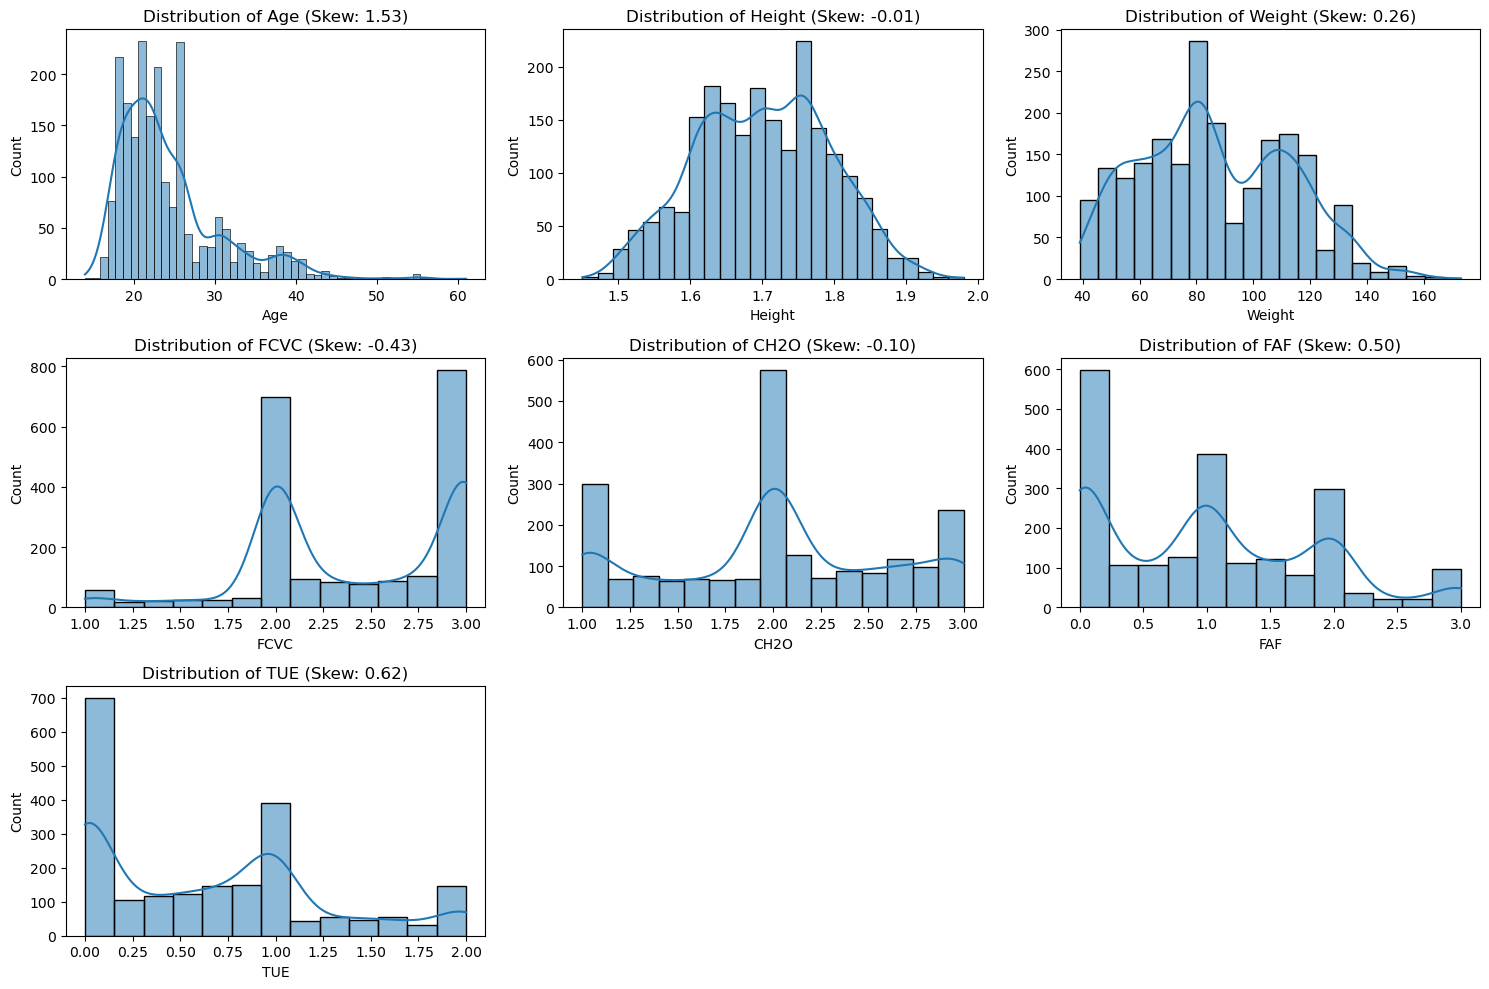

In [9]:

# 2. Skewness Analysis
skewness = data[numerical_cols].skew()
print("Skewness of numerical features:")
print(skewness)

# Visualize distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=data, x=col, kde=True)
    plt.title(f'Distribution of {col} (Skew: {skewness[col]:.2f})')
plt.tight_layout()
plt.show()


### 3. Feature Transformation:-
1) Log transform for highly skewed positive data
2) Square root for moderate skewness
3) Power transforms (Yeo-Johnson) for flexible normalization and Essential for linear model assumptions.
4) This will basically help you scale the data to appropriate limits, for example if one variable has range from 0-1000 and other has 0-10, prediction will deviate more against the one with more range even if the correlationn with the dataset having less range might be more. 

##### Textbook definition:-Feature transformation is a data preprocessing technique used to convert or change the format, scale, or distribution of raw data features into a new form that is more suitable for machine learning models and analysis. Feature transformation improves the quality and usefulness of data by making it compatible with the assumptions of statistical models or the requirements of machine learning algorithms. It is a critical step in the data preparation process that often leads to better model performance and more reliable insights. In essence, it changes raw features into a form that the model can more effectively interpret and learn from, thereby enhancing predictive power. 

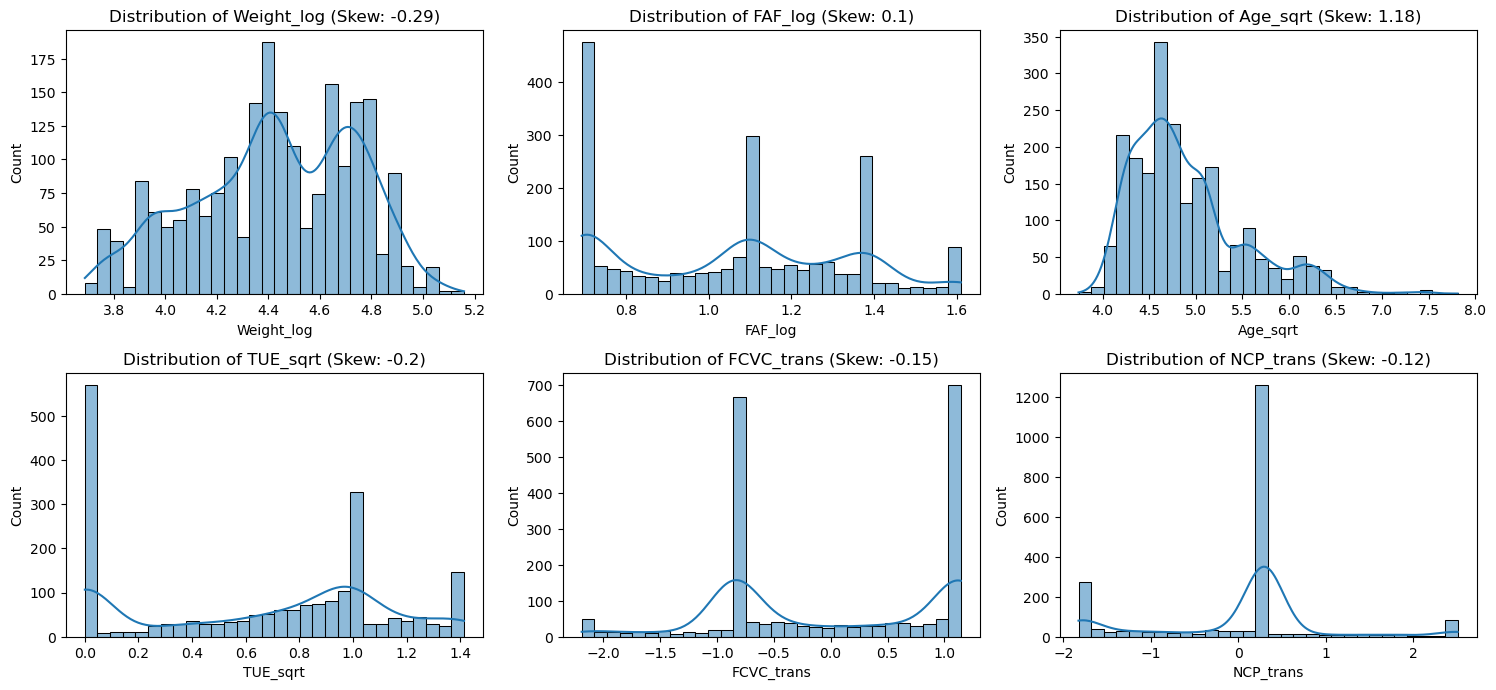

In [10]:

# 3. Feature Transformations
# Apply transformations to reduce skewness
data['Weight_log'] = np.log1p(data['Weight'])
data['FAF_log'] = np.log1p(data['FAF'] + 1)  # Adding 1 to handle zeros
data['Age_sqrt'] = np.sqrt(data['Age'])
data['TUE_sqrt'] = np.sqrt(data['TUE'])

# Power transform (Yeo-Johnson) for other features
pt = PowerTransformer()
data[['FCVC_trans', 'NCP_trans']] = pt.fit_transform(data[['FCVC', 'NCP']])

#plot
transformed_cols = ['Weight_log', 'FAF_log', 'Age_sqrt', 'TUE_sqrt', 'FCVC_trans', 'NCP_trans']

plt.figure(figsize=(15, 10))

for i, col in enumerate(transformed_cols):
    plt.subplot(3, 3, i+1)
    skew_val = data[col].skew().round(2)  # compute skewness
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col} (Skew: {skew_val})')

plt.tight_layout()
plt.show()

### Interaction and Polynomial features
**Interaction & Polynomial Features:**
Interaction terms capture feature relationships

Polynomials model non-linear patterns

BMI is clinically relevant for obesity prediction

Creates more informative features for models
##### Sometimes, when we combine two or more features (or pieces of information) from our data, new relationships can appear between them. Interaction and Polynomial features help us find and understand these relationships, especially when they are not simple or straight-line (non-linear). This means they help us see how different features work together in more complex ways.

In [11]:


# 4. Interaction & Polynomial Features
data['Age_Weight'] = data['Age'] * data['Weight']
data['Height_Weight'] = data['Height'] * data['Weight']
data['FAF_TUE'] = data['FAF'] * data['TUE']
data['Age_sq'] = data['Age'] ** 2
data['Weight_sq'] = data['Weight'] ** 2
data['Height_sq'] = data['Height'] ** 2
data['BMI'] = data['Weight'] / (data['Height'] ** 2)


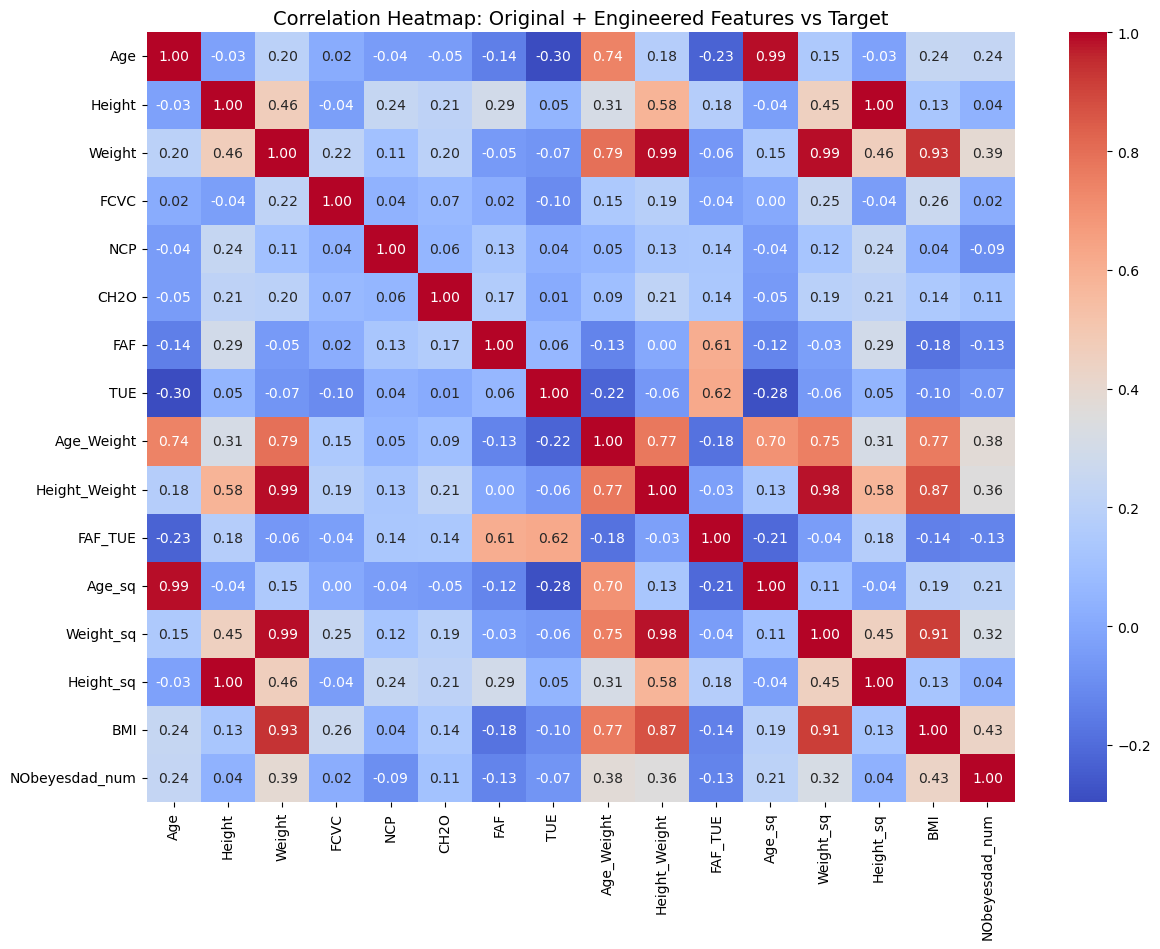

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant numerical + engineered + target
corr_cols = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE',
             'Age_Weight','Height_Weight','FAF_TUE',
             'Age_sq','Weight_sq','Height_sq','BMI']

# Convert target (NObeyesdad) to numeric labels for correlation
data['NObeyesdad_num'] = data['NObeyesdad'].astype('category').cat.codes

corr_cols.append('NObeyesdad_num')

# Compute correlation matrix
corr = data[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap: Original + Engineered Features vs Target", fontsize=14)
plt.show()


**5. Feature Selection Techniques**

In [13]:

# 5. Feature Selection Technique

# Separate features and target
X = data_encoded.drop('NObeyesdad', axis=1) if 'NObeyesdad' in data_encoded.columns else data_encoded
y = data_encoded['NObeyesdad'] if 'NObeyesdad' in data_encoded.columns else None


### Mutual information and Random forest feature
##### Mutual Informatiomn and Random Forest feature:- Mutual information measures how much knowing a feature’s value helps us predict the result. If the mutual information is high, the feature gives us a lot of useful information about the result.
##### Textbook Definition:- Mutual information is a statistical measure that quantifies how much knowing the value of one variable reduces uncertainty about another variable. In the context of machine learning, it’s used to measure the dependency between a feature and the target variable. If the mutual information is high, knowing the feature gives a lot of information about the target, which means the feature is important. If mutual information is zero, the feature and target are independent.
##### Random forest feature importance shows which feature values have the biggest impact on getting the right result. The more a feature helps the model make correct decisions, the more important it is.
##### Textbook Definition:- Random forest feature importance is a way of ranking which features are most useful for predicting the target variable when using a random forest model. A random forest is made up of multiple decision trees, and as each tree splits the data, it uses different features to reduce impurity (randomness or disorder). The amount by which each feature helps decrease impurity is measured and averaged across all trees. Features that lead to the biggest reductions in impurity are considered more important.


Mutual Information Scores:
Weight                            1.257692
Age                               0.587840
Height                            0.413877
FCVC                              0.408149
FAF                               0.289221
CH2O                              0.288325
NCP                               0.276376
TUE                               0.265922
Gender                            0.206667
CAEC                              0.160590
family_history_with_overweight    0.159459
CALC                              0.101589
MTRANS                            0.076982
FAVC                              0.059818
SCC                               0.031787
SMOKE                             0.007493
dtype: float64


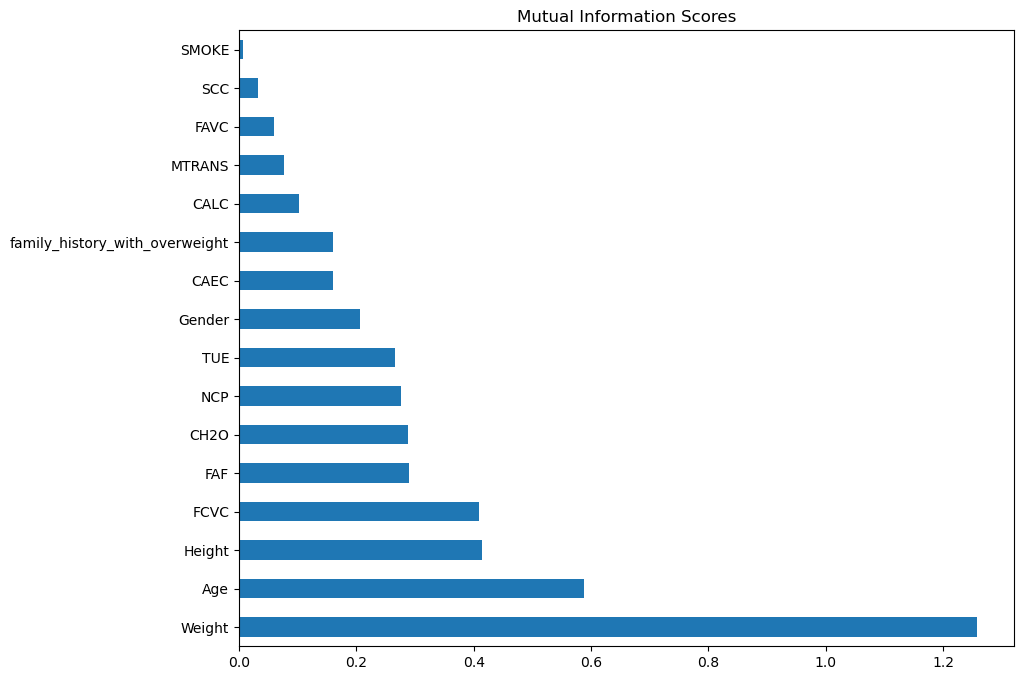


Random Forest Feature Importances:
Weight                            0.352141
Height                            0.101677
FCVC                              0.091611
Age                               0.090277
Gender                            0.055029
NCP                               0.049859
TUE                               0.045111
CH2O                              0.042046
FAF                               0.041018
CAEC                              0.030950
family_history_with_overweight    0.030624
CALC                              0.027917
MTRANS                            0.018815
FAVC                              0.015487
SCC                               0.005592
SMOKE                             0.001847
dtype: float64


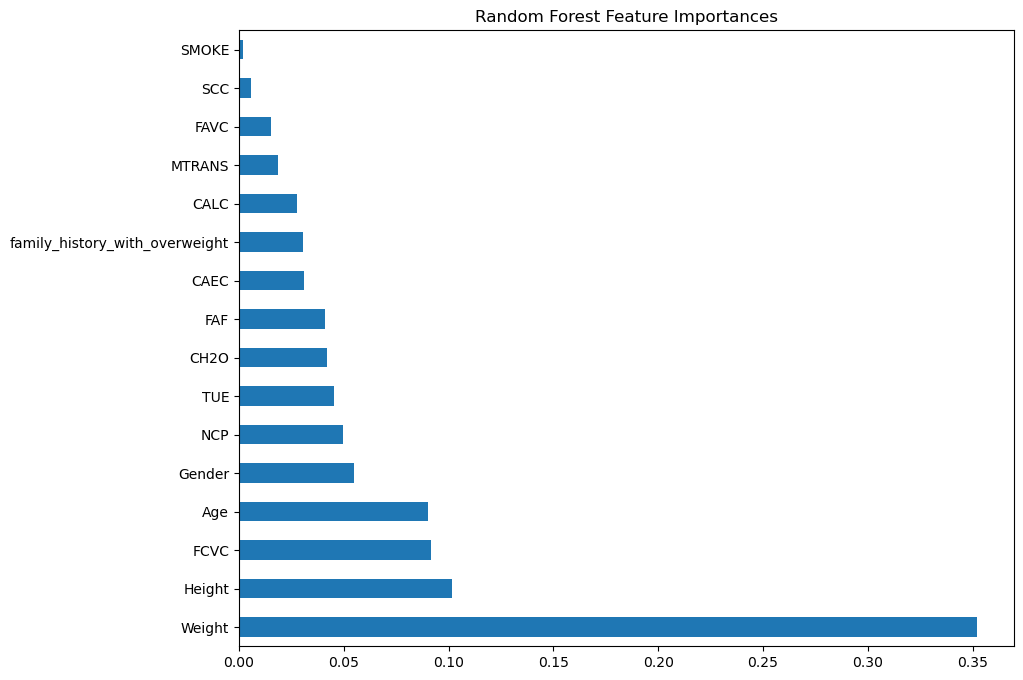


Selected Top Features:
['CH2O', 'Gender', 'FAF', 'Age', 'FCVC', 'NCP', 'TUE', 'Weight', 'CAEC', 'Height']


In [14]:

# Calculate mutual information if target exists
if y is not None:
    # Identify which features are discrete (categorical)
    discrete_features = [i for i, col in enumerate(X.columns) if col in cat_cols]

    # Calculate mutual information
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features if discrete_features else 'auto',
                                   random_state=42)

    mi_scores = pd.Series(mi_scores, index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)

    print("\nMutual Information Scores:")
    print(mi_scores)

    # Plot top mutual information scores
    plt.figure(figsize=(10, 8))
    mi_scores.plot(kind='barh')
    plt.title('Mutual Information Scores')
    plt.show()

    # Random Forest Feature Importance
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, y)

    importances = pd.Series(rf.feature_importances_, index=X.columns)
    importances = importances.sort_values(ascending=False)

    print("\nRandom Forest Feature Importances:")
    print(importances)

    plt.figure(figsize=(10, 8))
    importances.plot(kind='barh')
    plt.title('Random Forest Feature Importances')
    plt.show()

    # Select top features based on both methods
    top_features = list(set(mi_scores.head(10).index.tolist() + importances.head(10).index.tolist()))
    print("\nSelected Top Features:")
    print(top_features)
else:
    print("Target variable 'NObeyesdad' not found in the dataset")